## Comparación de la mediana, la gaussiana y el filtrado RBF

- **Tarea 3.** Trabajando con datos.... https://ourworldindata.org/working-hours (https://ourworldindata.org/grapher/annual-working-hours-per-worker?time=1950..latest&country=DEU~USA~BRA~CHN~KOR~IND). Este dataset representa las horas de trabajo para varios paises desde 1970 a 2017, más o menos.. Lo que queremos hacer es explorar nuevamente los métodos de interpolación y mirar la tolerancia de los métodos, es decir, hasta donde podemos interpolar cuando hay missing data. Entonces el reto es hacer un pequeño notebook para explorar esto, debemos hacer el ejercicio para varios paises y luego hacer varias pruebas quitando conjuntos de datos (filas en el archivo) y mirar el comportamiento de la estimación en términos de la cantidad de datos borrados. Hay varios métodos diferentes para suavizar una señal ruidosa. Hay muchos métodos pero hay tres métodos de suavizado comunes, a saber, un **filtro de mediana**, **un filtro gaussiano** y un suavizado de **función de base radial (RBF)**. La RBF es una potente herramienta no sólo para el suavizado de datos multivariantes, sino también para la interpolación, la regresión, etc. La siguiente figura muestra el magnífico rendimiento de RBF en comparación con los filtros de mediana y gaussiano. Ahora explore la interpolación de estos datos como antes pero ambién usando los filtros mencionados y saque conclusiones sobre su rentabilidad y rendimiento.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
%matplotlib inline
#rcParams.keys()

In [61]:
# Todos los filtros que queremos usar aquí están en
from scipy.interpolate import Rbf
from scipy.signal import gaussian
from scipy.signal import medfilt
from scipy.interpolate import interp1d

In [62]:
df = pd.read_csv('../datas/annual-working-hours-per-worker.csv')
df

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112
...,...,...,...,...
3465,Vietnam,VNM,2013,2267.4883
3466,Vietnam,VNM,2014,2150.6357
3467,Vietnam,VNM,2015,2169.5916
3468,Vietnam,VNM,2016,2169.5916


In [63]:
dfARG =pd.DataFrame()
dfARG = df[df.Code == 'ARG']
dfARG

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112
...,...,...,...,...
63,Argentina,ARG,2013,1714.8711
64,Argentina,ARG,2014,1695.3640
65,Argentina,ARG,2015,1691.5363
66,Argentina,ARG,2016,1691.5363


In [116]:
x = dfARG['Year'].values
x

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017], dtype=int64)

In [117]:
y =dfARG['Average annual working hours per worker'].values
y

array([2034.    , 2037.8667, 2041.7408, 2045.6223, 2049.5112, 2053.4075,
       2057.311 , 2061.2222, 2065.1406, 2069.0667, 2073.    , 2066.2004,
       2059.4233, 2052.6685, 2045.9355, 2039.2249, 2032.5361, 2025.8694,
       2019.2245, 2012.6013, 2006.    , 2002.6611, 1999.3278, 1996.    ,
       1992.8422, 1989.6893, 1986.5415, 1983.3987, 1980.2609, 1977.1279,
       1974.    , 1961.2301, 1948.5427, 1935.9375, 1923.4137, 1910.9711,
       1898.6089, 1886.3267, 1874.1238, 1862.    , 1850.    , 1837.9608,
       1826.    , 1850.3378, 1875.    , 1881.9612, 1888.9481, 1895.9611,
       1903.    , 1887.285 , 1862.1362, 1811.1526, 1710.0365, 1713.5746,
       1730.8173, 1761.3994, 1765.6013, 1780.5565, 1781.4246, 1742.9043,
       1751.7655, 1750.9741, 1726.2584, 1714.8711, 1695.364 , 1691.5363,
       1691.5363, 1691.5363])

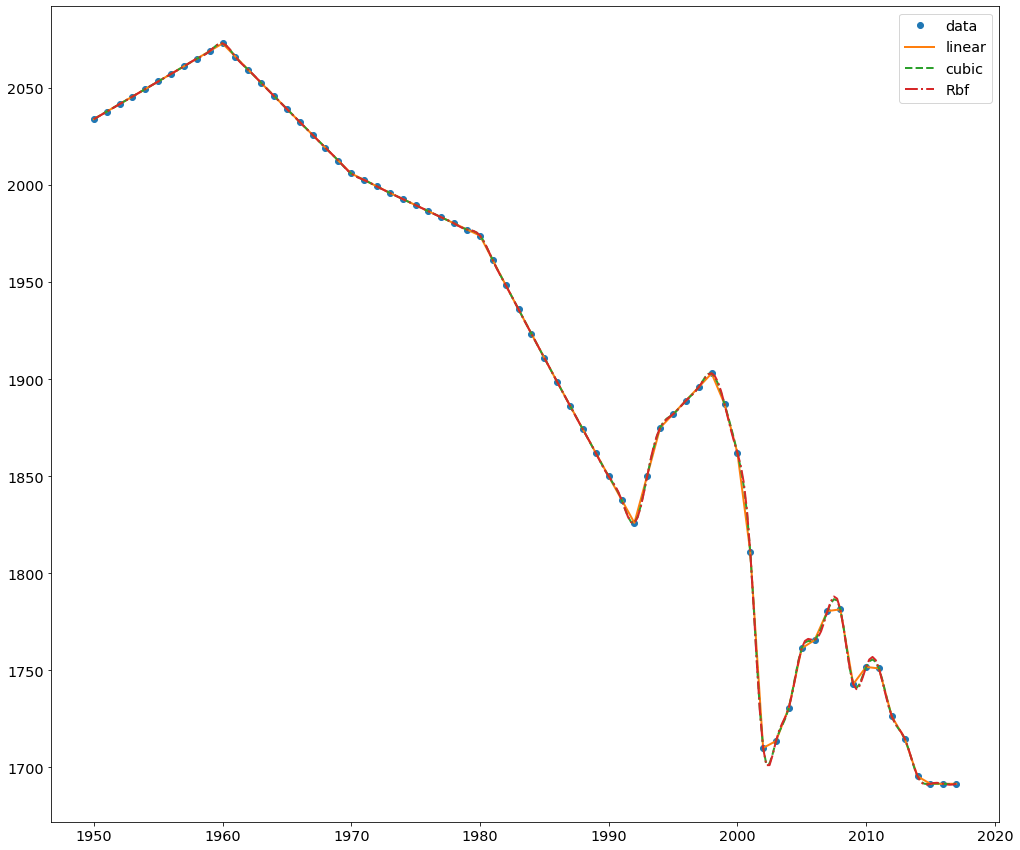

In [118]:
plt.figure(figsize=(17,15))
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
# Aquí cargamos la función para hacer la interpolación usando RBF
rbf = Rbf(x, y, function='quintic', smooth=1E-3)
s = rbf(xnew)
xnew = np.linspace(np.min(x), np.max(x), num=(np.max(x)-np.min(x))*4+1, endpoint=True)

plt.plot(x, y, 'o', label='data')
plt.plot(xnew, f(xnew), '-', label='linear')
plt.plot(xnew, f2(xnew), '--', label='cubic')
plt.plot(xnew, s, '-.', label='Rbf')
plt.legend(loc='best')

plt.show()


# Consideremos ahora que se han perdido los datos en un periodo de tiempo de 10 años, comenzando en el año $1950+a$, con $0 \leq a \leq 57$.

Revisando la interpolación para estos datos y estudiando su **error cuadrático**, respecto a los datos obtenidos inicialmente.

EL error cuadrático cometido en la interpolación lineal es:  358.35974454545203
EL error cuadrático cometido en la interpolación por splines cúbicos es:  5996.979845369173
EL error cuadrático cometido en la interpolación por RBF es:  1461.2289585975725


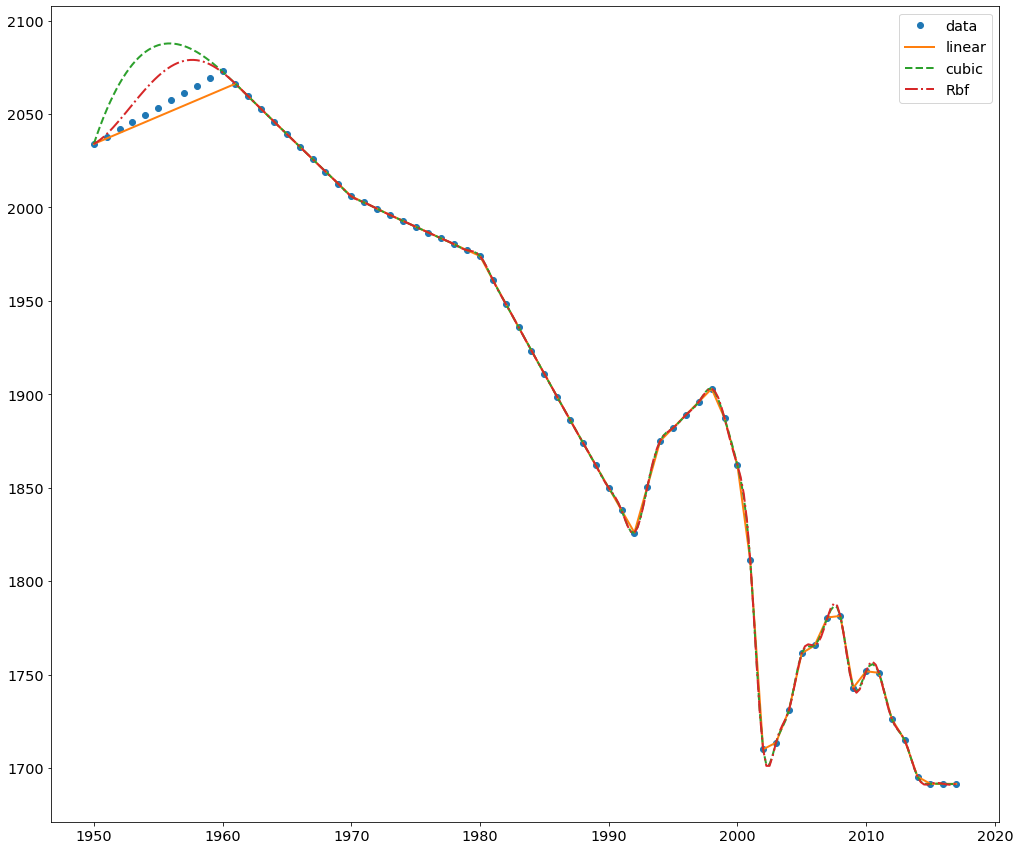

In [185]:
def missingData(dfARG,a,interv = 10):
    x = dfARG['Year'].values
    y =dfARG['Average annual working hours per worker'].values
    error=0
    dfARG_1=pd.DataFrame()
    b=a+interv
    dfARG_1= dfARG.drop(range(a, b, 1),axis=0)
    x1=dfARG_1['Year'].values
    y1=dfARG_1['Average annual working hours per worker'].values
    f = interp1d(x1, y1)
    errorL = np.sum([(y[i]-f(x[i]))**2 for i in range(a, b, 1)])
    print('EL error cuadrático cometido en la interpolación lineal es: ', errorL)
    f2 = interp1d(x1, y1, kind='cubic')
    errorSC = np.sum([(y[i]-f2(x[i]))**2 for i in range(a, b, 1)])
    print('EL error cuadrático cometido en la interpolación por splines cúbicos es: ', errorSC)
    rbf = Rbf(x1, y1, function='quintic', smooth=1E-3)
    errorRBF = np.sum([(y[i]-rbf(x[i]))**2 for i in range(a, b, 1)])
    print('EL error cuadrático cometido en la interpolación por RBF es: ', errorRBF)
    # Aquí cargamos la función para hacer la interpolación usando RBF
    
    xnew = np.linspace(np.min(x), np.max(x), num=(np.max(x)-np.min(x))*4+1, endpoint=True)
    plt.figure(figsize=(17,15))
    plt.plot(x, y, 'o', label='data')
    plt.plot(xnew, f(xnew), '-', label='linear')
    plt.plot(xnew, f2(xnew), '--', label='cubic')
    plt.plot(xnew, rbf(xnew), '-.', label='Rbf')
    plt.legend(loc='best')
    plt.show()
    return (x1,y1)
(x1,y1) = missingData(dfARG, 1)


EL error cuadrático cometido en la interpolación lineal es:  44.78897811000045
EL error cuadrático cometido en la interpolación por splines cúbicos es:  764.230819734438
EL error cuadrático cometido en la interpolación por RBF es:  1160.2027617096912


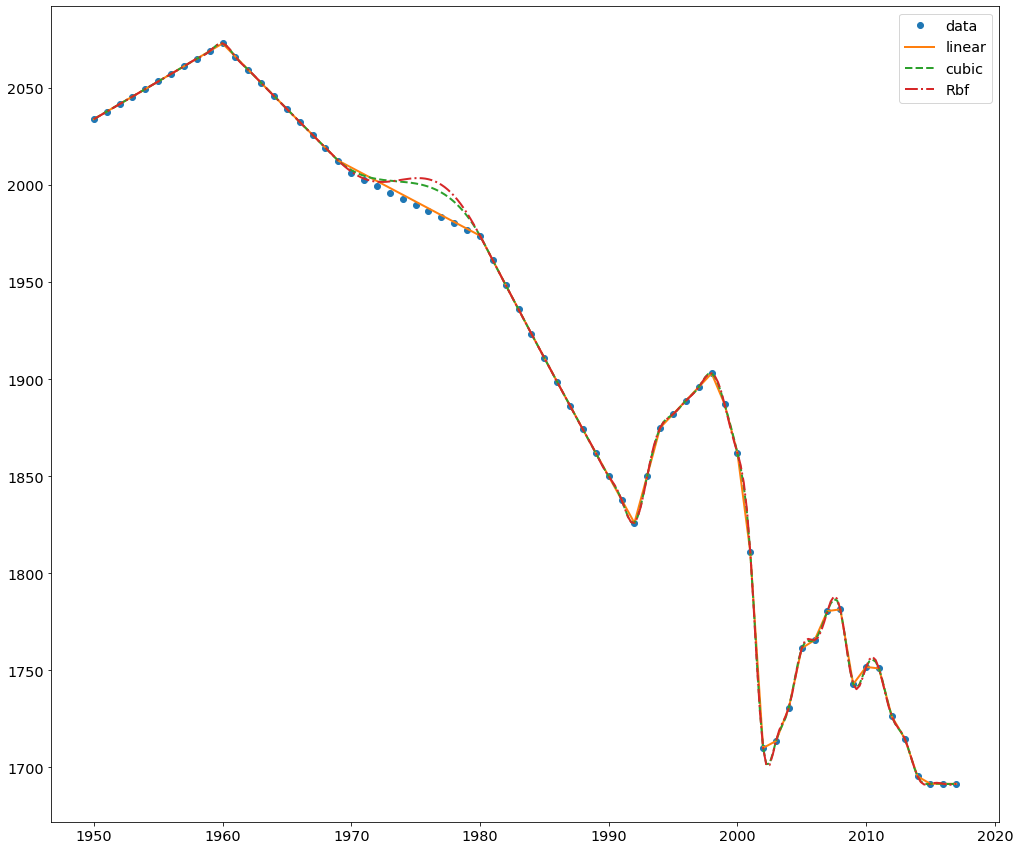

In [186]:
(x1,y1) = missingData(dfARG, 20)

EL error cuadrático cometido en la interpolación lineal es:  6895.229524849118
EL error cuadrático cometido en la interpolación por splines cúbicos es:  2426.335666050863
EL error cuadrático cometido en la interpolación por RBF es:  306492.3670147813


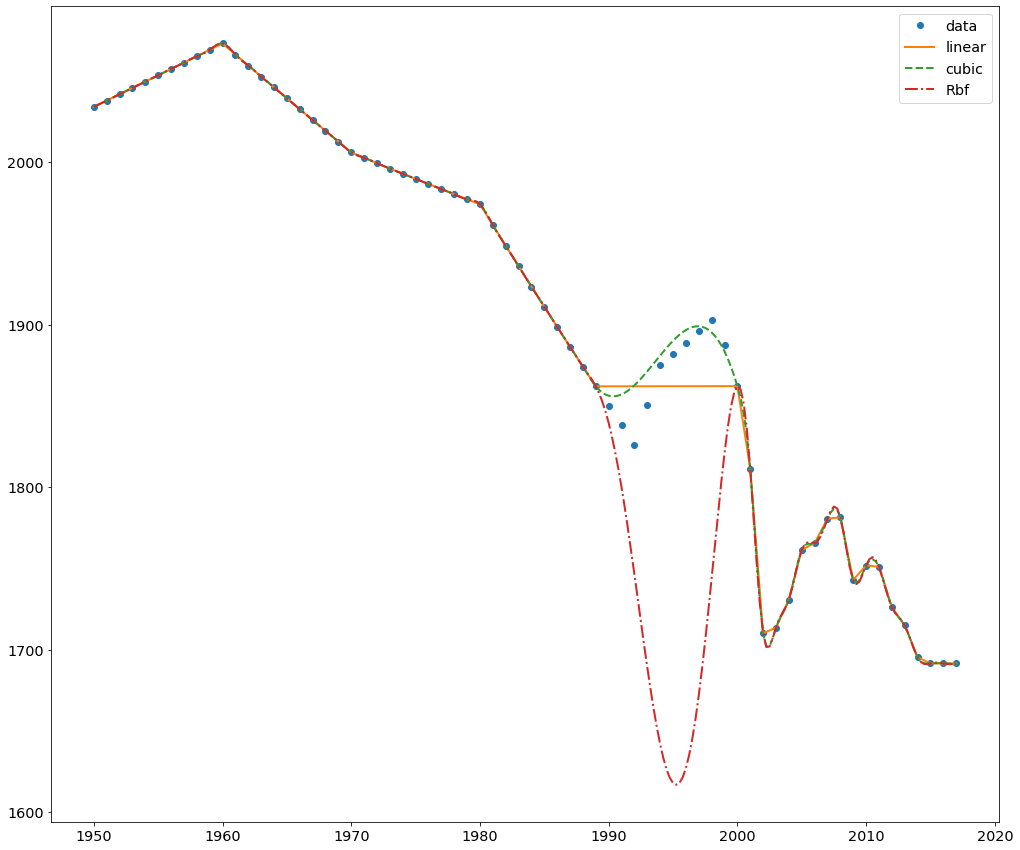

In [188]:
(x1,y1) = missingData(dfARG, 40)


EL error cuadrático cometido en la interpolación lineal es:  51477.14497667283
EL error cuadrático cometido en la interpolación por splines cúbicos es:  28228.666824478947
EL error cuadrático cometido en la interpolación por RBF es:  82900.80939833353


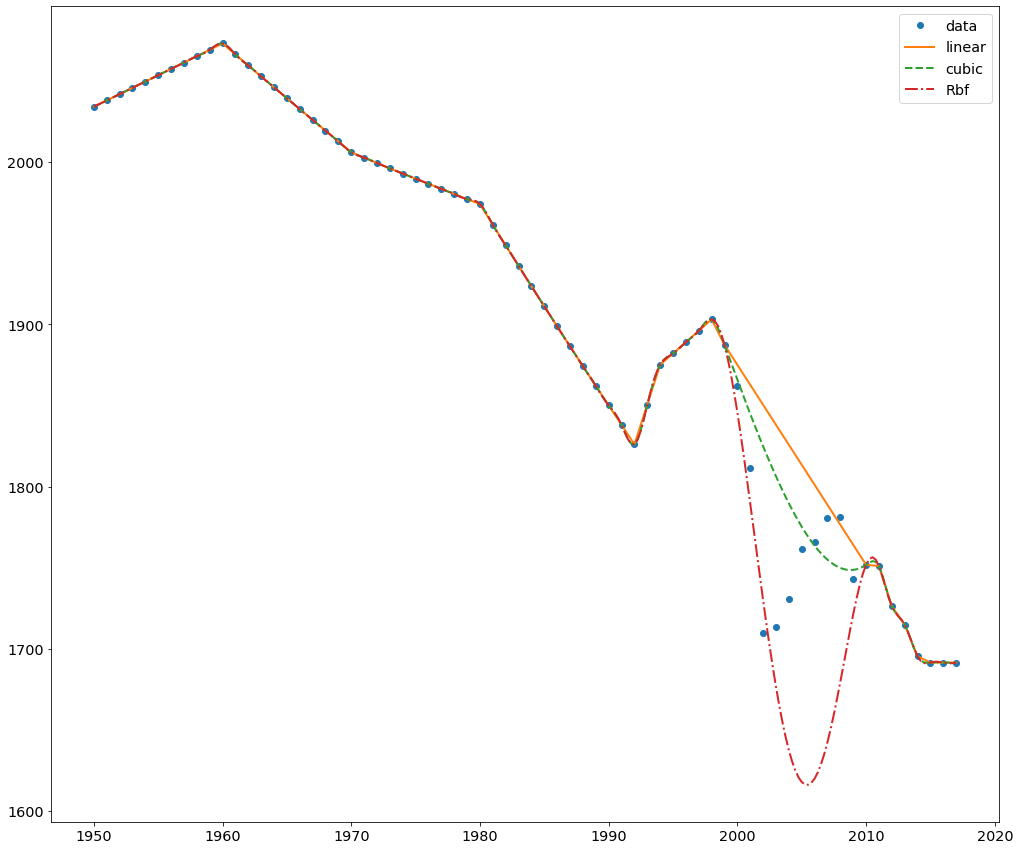

In [189]:
(x1,y1) = missingData(dfARG, 50)

EL error cuadrático cometido en la interpolación lineal es:  2377.286159331801
EL error cuadrático cometido en la interpolación por splines cúbicos es:  489749.08127535344
EL error cuadrático cometido en la interpolación por RBF es:  867573.9777951132


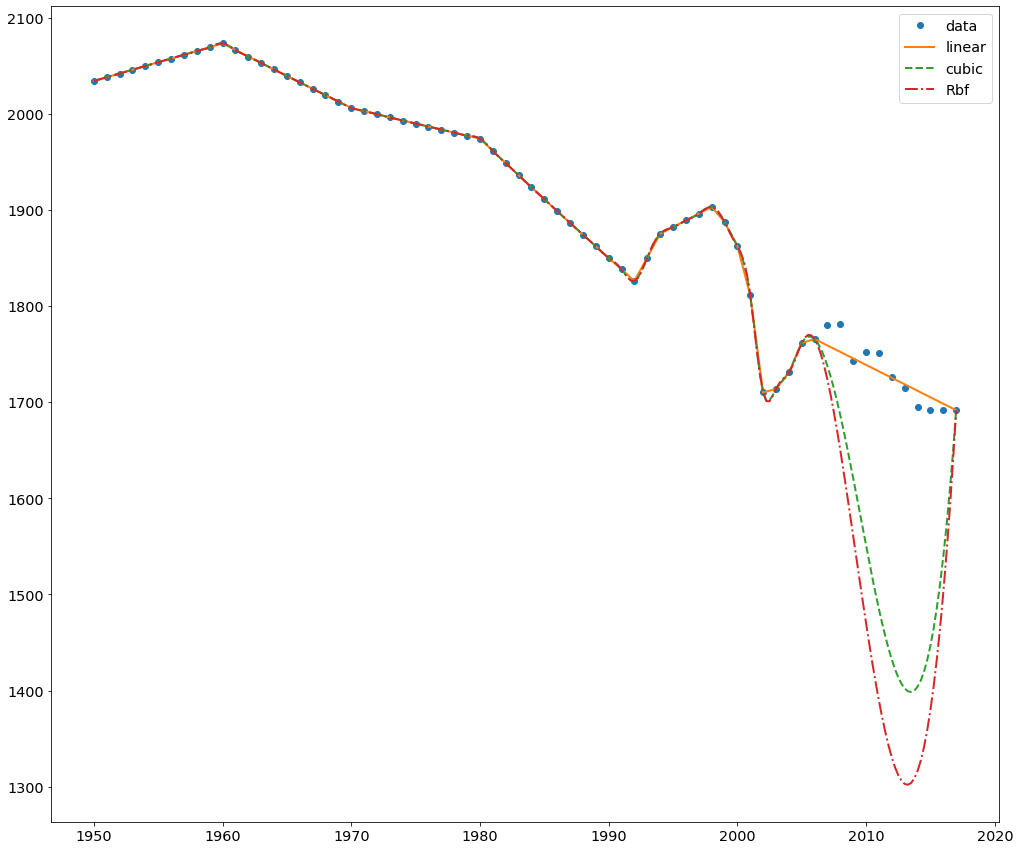

In [190]:
(x1,y1) = missingData(dfARG, 57)


EL error cuadrático cometido en la interpolación lineal es:  1792.6342790274953
EL error cuadrático cometido en la interpolación por splines cúbicos es:  1505.8205797092387
EL error cuadrático cometido en la interpolación por RBF es:  9514.363695229413


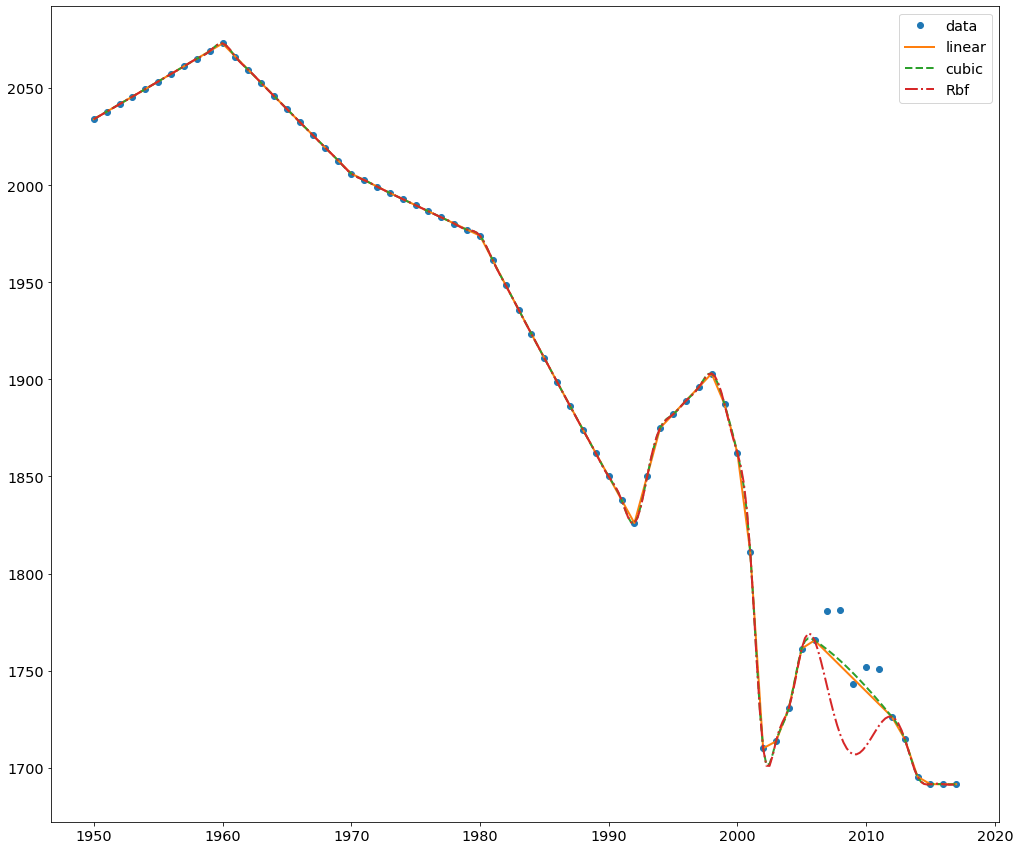

In [191]:
(x1,y1) = missingData(dfARG, 57,5)